In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('red.jpeg')

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


resized_img =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#variable was resizing earlier but now name that as it is being used everywhere  
plt.rcParams['figure.figsize'] = 10, 10

<function matplotlib.pyplot.show(close=None, block=None)>

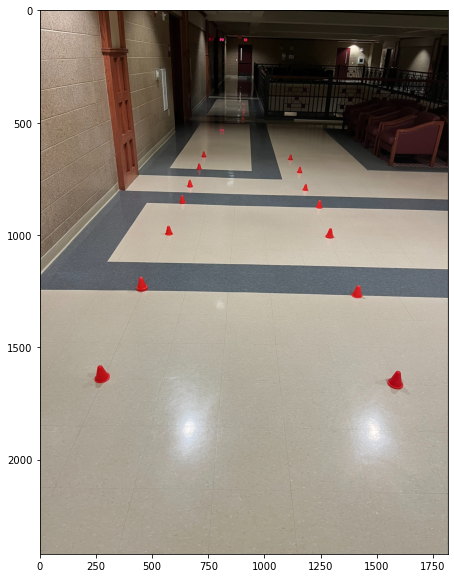

In [4]:

plt.imshow(image_rgb)#showing default image
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

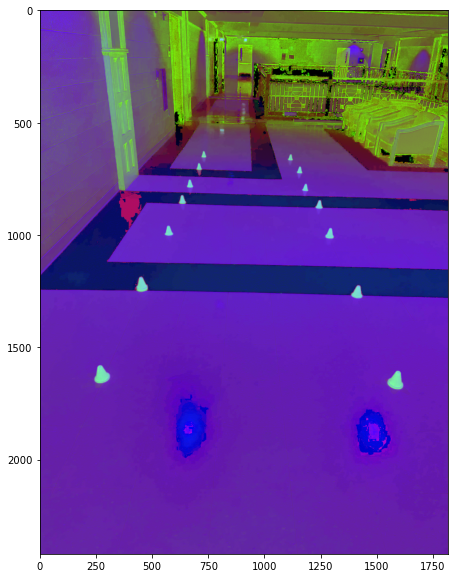

In [5]:
hsv = cv2.cvtColor(resized_img, cv2.COLOR_BGR2HSV)#
plt.imshow(hsv)#sconverting to hsv to make it easier to extract value from images
plt.show

In [6]:
lower_red = np.array([0, 135, 135])
upper_red = np.array([179,255,255])#defining ranges for red


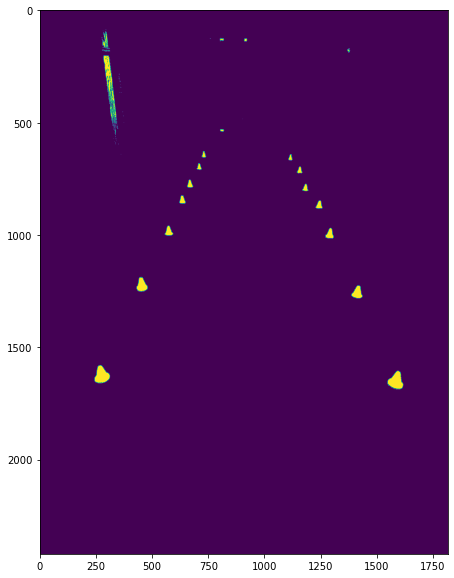

In [7]:

mask = cv2.inRange(hsv, lower_red, upper_red)#masking red color
img_edges = cv2.Canny(mask, 80, 160)
plt.imshow(mask)
plt.show()



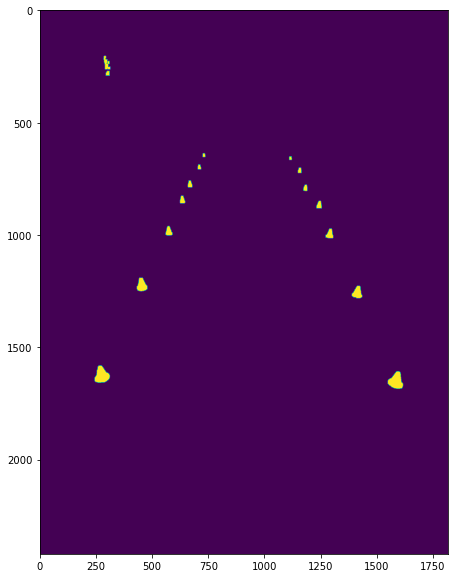

In [8]:
kernel = np.ones((9,9))


img_thresh_opened = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
img_thresh_blurred = cv2.medianBlur(img_thresh_opened, 7)
plt.imshow(img_thresh_opened)
cv2.waitKey(0)
cv2.destroyAllWindows()


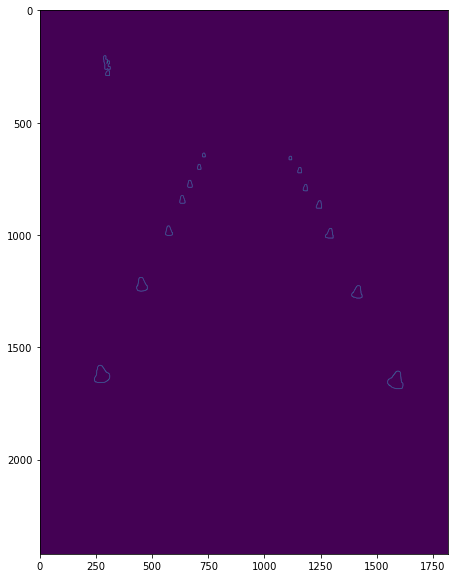

In [9]:
img_edges = cv2.Canny(img_thresh_opened, 80, 160)
plt.imshow(img_edges)
plt.show()

In [10]:
final = cv2.bitwise_or(img_edges, mask)#taking common values 
contours, hierarchy = cv2.findContours(final, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)#finding 



In [11]:
count=1
cf2=[]
x1=0
y1=0
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)#filtering data using ratio of h/w and making sure they are of decent size
    if 1.1<(h/w)<2.2 and w*h>300 :
        x1=x
        y1=y
        cf2.append(cnt)
        count+=1



In [12]:
color = (0, 255, 0) # green color
thickness = 2
tod2=resized_img

In [13]:
points=[]
rhs=[]
lhs=[]
for cnt in cf2:
    x, y, w, h = cv2.boundingRect(cnt)#finding x , y coordinates to make the lines
    point=(x,y)
    #print(x, " " ,y)
    points.append(point)

for r in points[::2]:
    rhs.append(r)


In [14]:
set1 = set(rhs)
set2 = set(points)
setl=set2-set1
lhs=list(setl)#subtracting 2 sets to find the left side values


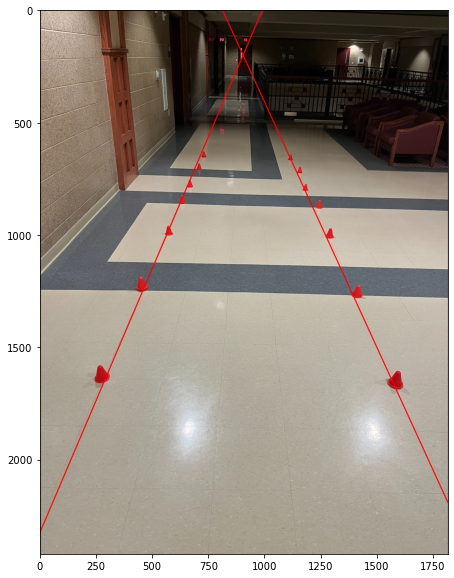

In [16]:
#right hand line
slope_r = (rhs[0][1]-rhs[-1][1])/(rhs[0][0]-rhs[-1][0])
x1=rhs[0][0]+1000
y1=  int(slope_r * (x1- rhs[0][0]) + rhs[0][1])
ptr = (x1,y1)
pt2=(rhs[-1][0],rhs[-1][1])
# calculate the endpoint of the line
x = pt2[0] - 1000
y = int(slope_r * (x - pt2[0]) + pt2[1])
endpointr = (x, y)


#lefthand line
slope_l= (lhs[0][1]-lhs[-1][1])/(lhs[0][0]-lhs[-1][0])
x1l=lhs[0][0]+1000
y1l=  int(slope_l * (x1l- lhs[0][0]) + lhs[0][1])
ptl = (x1l,y1l)
pt2l=(lhs[-1][0],lhs[-1][1])
# calculate the endpoint of the line
xl = pt2l[0] -100000
yl = int(slope_l * (xl - pt2l[0]) + pt2l[1])
endpointl = (xl, yl)

# draw the line using the endpoint and the given point
img = cv2.line(resized_img, ptr, endpointr, (255, 0, 0), 3)
img2= cv2.line(resized_img, ptl, endpointl, (255, 0, 0), 3)


# display the image
plt.imshow(resized_img)
plt.savefig('answer.png')